In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from matplotlib.colors import colorConverter, ListedColormap

In [2]:
# 对于上面的fit可以这么扩展变成动态的
from sklearn.preprocessing import OneHotEncoder
def onehot(y,start,end):
    ohe = OneHotEncoder()
    a = np.linspace(start,end-1,end-start)
    b =np.reshape(a,[-1,1]).astype(np.int32)
    ohe.fit(b)
    c=ohe.transform(y).toarray()  
    return c  

### 1.生成样本集

In [3]:
def generate(sample_size, num_classes, diff,regression=False):
    np.random.seed(10)
    mean = np.random.randn(2)
    cov = np.eye(2)  
    
    #len(diff)
    samples_per_class = int(sample_size/num_classes)

    X0 = np.random.multivariate_normal(mean, cov, samples_per_class)
    Y0 = np.zeros(samples_per_class)
    
    for ci, d in enumerate(diff):
        X1 = np.random.multivariate_normal(mean+d, cov, samples_per_class)
        Y1 = (ci+1)*np.ones(samples_per_class)
    
        X0 = np.concatenate((X0,X1))
        Y0 = np.concatenate((Y0,Y1))
        #print(X0, Y0)
        
    if regression==False: #one-hot  0 into the vector "1 0
        Y0 = np.reshape(Y0,[-1,1])        
        #print(Y0.astype(np.int32))
        Y0 = onehot(Y0.astype(np.int32),0,num_classes)
        #print(Y0)
    X, Y = shuffle(X0, Y0)
    #print(X, Y)
    return X,Y    

C:\Users\fq\Anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


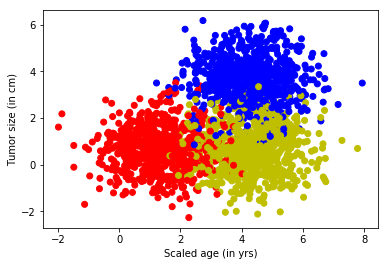

In [4]:
# 定义随机数的种子值（这样可以保证每次运行代码时生成的随机值都一样）
np.random.seed(10)

# 输入数据的维度
input_dim = 2
# 定义生成类的个数
num_classes =3 

# 生成2000个点，3类数据
X, Y = generate(2000,num_classes,  [[3.0],[3.0,0]],False)

# 散点图
aa = [np.argmax(l) for l in Y]
colors =['r' if l == 0 else 'b' if l==1 else 'y' for l in aa[:]]
plt.scatter(X[:,0], X[:,1], c=colors)
plt.xlabel("Scaled age (in yrs)")
plt.ylabel("Tumor size (in cm)")
plt.show()

### 2.构建网络结构

In [5]:
# 标签维度
lab_dim = num_classes

# tf Graph Input
input_features = tf.placeholder(tf.float32, [None, input_dim])
input_lables = tf.placeholder(tf.float32, [None, lab_dim])

# Set model weights
W = tf.Variable(tf.random_normal([input_dim,lab_dim]), name="weight")
b = tf.Variable(tf.zeros([lab_dim]), name="bias")
output = tf.matmul(input_features, W) + b

z = tf.nn.softmax( output )

a1 = tf.argmax(tf.nn.softmax( output ), axis=1)#按行找出最大索引，生成数组
b1 = tf.argmax(input_lables, axis=1)
err = tf.count_nonzero(a1-b1) #两个数组相减，不为0的就是错误个数

cross_entropy = tf.nn.softmax_cross_entropy_with_logits( labels=input_lables,logits=output)
loss = tf.reduce_mean(cross_entropy)#对交叉熵取均值很有必要


optimizer = tf.train.AdamOptimizer(0.04) #尽量用这个--收敛快，会动态调节梯度
train = optimizer.minimize(loss)  # let the optimizer train

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



### 3.设置参数进行训练

Epoch: 0001 cost= 0.465532154 err= 0.552405063291139
Epoch: 0002 cost= 0.346173644 err= 0.1073417721518988
Epoch: 0003 cost= 0.323115259 err= 0.10430379746835448
Epoch: 0004 cost= 0.319208384 err= 0.10126582278481017
Epoch: 0005 cost= 0.322005779 err= 0.10025316455696208
Epoch: 0006 cost= 0.327402502 err= 0.09772151898734184
Epoch: 0007 cost= 0.333735734 err= 0.09518987341772159
Epoch: 0008 cost= 0.340260804 err= 0.09518987341772159
Epoch: 0009 cost= 0.346631169 err= 0.09468354430379752
Epoch: 0010 cost= 0.352688134 err= 0.09215189873417727
Epoch: 0011 cost= 0.358365923 err= 0.09265822784810132
Epoch: 0012 cost= 0.363645792 err= 0.09316455696202537
Epoch: 0013 cost= 0.368532747 err= 0.09164556962025322
Epoch: 0014 cost= 0.373043358 err= 0.09063291139240512
Epoch: 0015 cost= 0.377199739 err= 0.08962025316455702
Epoch: 0016 cost= 0.381025761 err= 0.08962025316455702
Epoch: 0017 cost= 0.384545892 err= 0.08962025316455702
Epoch: 0018 cost= 0.387783587 err= 0.08911392405063297
Epoch: 0019 c

C:\Users\fq\Anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


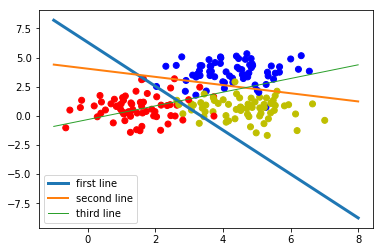

[[-2.3680265  0.6306918  0.7345677]
 [-1.2562143  1.7952055 -1.2505974]] [ 7.937337   -7.2637815  -0.40161836]


C:\Users\fq\Anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


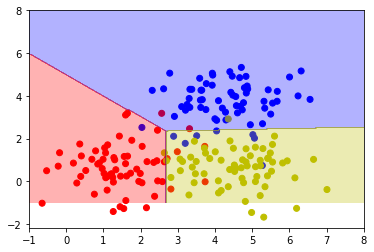

In [6]:
# 迭代50次
maxEpochs = 50
# 每批次的训练数量
minibatchSize = 25

# 启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(maxEpochs):
        sumerr=0
        # len(Y)/minibatchSize为每一次迭代的批次数
        for i in range(np.int32(len(Y)/minibatchSize)):
            x1 = X[i*minibatchSize:(i+1)*minibatchSize,:]
            y1 = Y[i*minibatchSize:(i+1)*minibatchSize,:]

            _,lossval, outputval,errval = sess.run([train,loss,output,err], 
                                                   feed_dict={input_features: x1, 
                                                              input_lables:y1})
            # 记录每次迭代的累计误差
            sumerr =sumerr+(errval/minibatchSize)

        print ("Epoch:", '%04d' % (epoch+1), 
               "cost=","{:.9f}".format(lossval),
               "err=",sumerr/(np.int32(len(Y)/minibatchSize)))
    
    
# 4.数据可视化
    train_X, train_Y = generate(200, num_classes, [[3.0],[3.0,0]], False)
    aa = [np.argmax(l) for l in train_Y]        
    colors =['r' if l == 0 else 'b' if l==1 else 'y' for l in aa[:]]
    plt.scatter(train_X[:,0], train_X[:,1], c=colors)
    
    x = np.linspace(-1,8,200) 

    y=-x*(sess.run(W)[0][0]/sess.run(W)[1][0])-sess.run(b)[0]/sess.run(W)[1][0]
    plt.plot(x,y, label='first line',lw=3)

    y=-x*(sess.run(W)[0][1]/sess.run(W)[1][1])-sess.run(b)[1]/sess.run(W)[1][1]
    plt.plot(x,y, label='second line',lw=2)

    y=-x*(sess.run(W)[0][2]/sess.run(W)[1][2])-sess.run(b)[2]/sess.run(W)[1][2]
    plt.plot(x,y, label='third line',lw=1)
    
    plt.legend()
    plt.show() 
    print(sess.run(W),sess.run(b))
    

    train_X, train_Y = generate(200,num_classes,  [[3.0],[3.0,0]],False)
    aa = [np.argmax(l) for l in train_Y]        
    colors =['r' if l == 0 else 'b' if l==1 else 'y' for l in aa[:]]
    plt.scatter(train_X[:,0], train_X[:,1], c=colors)    
    
    nb_of_xs = 200
    xs1 = np.linspace(-1, 8, num=nb_of_xs)
    xs2 = np.linspace(-1, 8, num=nb_of_xs)
    xx, yy = np.meshgrid(xs1, xs2) # create the grid
    # Initialize and fill the classification plane
    classification_plane = np.zeros((nb_of_xs, nb_of_xs))
    for i in range(nb_of_xs):
        for j in range(nb_of_xs):
            #classification_plane[i,j] = nn_predict(xx[i,j], yy[i,j])
            classification_plane[i,j] = sess.run(a1, feed_dict={input_features: [[ xx[i,j], yy[i,j] ]]} )
    
    
    # Create a color map to show the classification colors of each grid point
    cmap = ListedColormap([
            colorConverter.to_rgba('r', alpha=0.30),
            colorConverter.to_rgba('b', alpha=0.30),
            colorConverter.to_rgba('y', alpha=0.30)])
    # Plot the classification plane with decision boundary and input samples
    plt.contourf(xx, yy, classification_plane, cmap=cmap)
    plt.show()   